<img src="img/logo.png" alt="logo" align="center">

<br>
<br>

# **Chapter 3** &nbsp; &nbsp; <span style="color:#C13213">Kinematics I:</span> &nbsp; <span style="color:#5D6D7E">Linear Motion</span>

<br>
<br>

⚠️ This Chapter contains Python code. <span style="color:red">Ignore this Python code unless you'd like to study Python details.</span> The purpose of this code is to (a) create figures, and (b) show the reader details of real-world calculations.

___

<a name="toc"></a>
# Table of Contents

* [Kinematics (Overview)](#overview)
* [Fundmantal Physical Quantities](#quantities)
* [1D Kinematics](#1dkin)
* [Special Cases](#special)
	* [Constant velocity](#constvel)
	* [Constant acceleration](#constacc)
	* [Sinusoidal movement](#sinusoidal)
	* [Starting & stopping](#startstop)
	* [Deformation](#deformation)
* [Projectile Motion](#projectile)
* [Summary](#summary)



____

<a name="overview"></a>
# <span style="color:#000000">Kinematics (Overview)</span>
[Back to Table of Contents](#toc)
<br>
<br>

* Kinematics is the study of motion.
* Motion is caused by forces, but Kinematics does not consider forces; instead Kinematics is used to describe motion.
* "Kinematics" is a singular noun.
    * 🟢 &nbsp; Kinematics is the study of motion.
    * ❌ &nbsp; Kinematics are the study of motion.
* "Kinematic" is an adjective.
    * 🟢 &nbsp; The kinematic description was clear.
    * ❌ &nbsp; Kinematic is the study of motion.
* Types of motion:
    * Translation: linear motion from one point to another
    * Rotation: motion about an axis (or "around an axis")
    * Translation and rotation can and do occur at the same time
    * "Translation" and "rotation" are also called "linear motion" and "angular motion", respectively.
* This chapter considers one-dimensional linear motion
    



____

<a name="quantities"></a>
# <span style="color:#000000">Fundamental Physical Quantities</span>
[Back to Table of Contents](#toc)
<br>
<br>

* There are three fundamental physical quantities: length, time, and mass.
* The units for these quantities are meters, seconds and grams, respectively.
* All other physical quantities considered in this course can be derived from these fundamental quantities.
* All kinematics variables are derivations of just **length** and **time**.


| Quantity | Variable Symbol | Unit | Unit Symbol |
|:-------------:|:-------------:|:-----:|:-----:|
| Length | $$L$$ | meters | m |
| Time | $$t$$ | seconds | s |
| Mass | $$m$$ | grams | g |


____

<a name="1dkin"></a>
# <span style="color:#000000">1D Kinematics</span>
[Back to Table of Contents](#toc)
<br>
<br>


* In one-dimensional (1D) kinematic systems, there is only translation (no rotation); thus only linear motion will be considered in this chapter.
* For linear motion, there are three main kinematic variables: position, velocity and acceleration.



| Term | Symbol | Units | Definition |
|:-------------|:-------------|:-------------|:-------------|
| **Position** | $x$ | $\text{m}$ | The location of a point in 1D space |
| **Velocity** | $v$ | $\text{ms}^{-1}$ | The rate of change of position in time |
| **Acceleration** | $a$ | $\text{ms}^{-2}$ |  The rate of change of velocity in time |

* Velocity is the first time derivative of position c
* Acceleration is the second time derivative of position $\left(a = \frac{d^2x}{dt^2}\right)$, and the first time derivative of velocity $\left(a = \frac{dv}{dt}\right)$.
* Higher-order time derivates exist (third, fourth, fifth, etc.); this course considers only up to the second derivative (acceleration), but higher-order derivatives are important in some biomechanics applications, especially  injury, control and vibration.

<br>
<br>
<br>

Kinematic quantitites can be calculated from higher-order kinematic quantities using the integral function:
* Change in position is the integral of velocity over time: $\left(\Delta x = \int v \ dt\right)$
* Change in velocity is the integral of acceleration over time: $\left(\Delta v = \int a \ dt\right)$


<br>
<br>
<br>

To numerically calculate position, velocity and acceleration from a known kinematic [trajectory](https://en.wikipedia.org/wiki/Trajectory):

* If the position trajectory is known:
    * Velocity is the numerical gradient (i.e., derivative) of position
    * Acceleration is the numerical gradient of velocity
* If the velocity trajectory is known:
    * Position is the numerical integral of velocity
    * Accerlation is the numerical gradient of velocity
* If the acceleration trajectory is known:
    * Velocity is the numerical integral of acceleration
    * Position is the numerical integral of velocity



____

<a name="special"></a>
# <span style="color:#000000">Special Cases</span>
[Back to Table of Contents](#toc)
<br>
<br>

This section considers some important cases of 1D linear motion.

<a name="constvel"></a>
## <span style="color:#000000">Constant velocity</span>
[Back to Table of Contents](#toc)
<br>
<br>

When velocity is constant, position changes at a constant rate, and acceleration is zero.


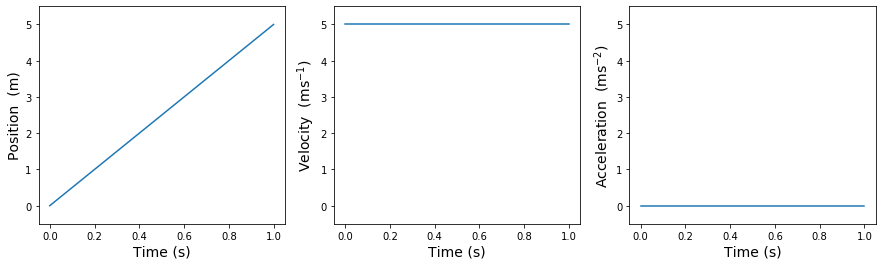

In [45]:
import numpy as np
from matplotlib import pyplot as plt


def gradient(t, a):
    '''
    Compute the temporal gradient of an array *a* given the time vector *t*
    '''
    return np.gradient(a)


def integral(t, a, a0=0):
    '''
    Compute the temporal integral of an array *a* given the time vector *t* and an initial value *a0*
    '''
    ig  = 2 * np.c_[np.r_[0, a[1:-1:2].cumsum()], a[::2].cumsum() - a[0] / 2].ravel()[:len(a)]
    ig *= np.gradient(t)
    ig += a0
    return ig


def plot_kinematics(t, x, v, a, ylim=None):
    '''
    Plot position, velocity and acceleration trajectories in a single figure
    '''
    fig,ax = plt.subplots(1, 3, figsize=(15,4))
    ax[0].plot(t, x)
    ax[1].plot(t, v)
    ax[2].plot(t, a)
    [axx.set_xlabel('Time (s)', size=14)  for axx in ax]
    ax[0].set_ylabel('Position  (m)', size=14)
    ax[1].set_ylabel(r'Velocity  ($\mathrm{ms}^{-1}$)', size=14)
    ax[2].set_ylabel(r'Acceleration  ($\mathrm{ms}^{-2}$)', size=14)
    if ylim is not None:
        plt.setp(ax, ylim=ylim)
    plt.show()


n      = 101                   # number of time nodes
t      = np.linspace(0, 1, n)  # time vector
v      = 5 * np.ones(n)        # velocity
x      = integral(t, v, 0)     # position
a      = gradient(t, v)        # acceleration

plot_kinematics(t, x, v, a, ylim=(-0.5,5.5))

<a name="constacc"></a>
## <span style="color:#000000">Constant acceleration</span>
[Back to Table of Contents](#toc)
<br>
<br>

When acceleration is constant, velocity changes at a constant rate, and acceleration is zero.

This case corresponds to a projectile, which accelerates downward at a constant rate.


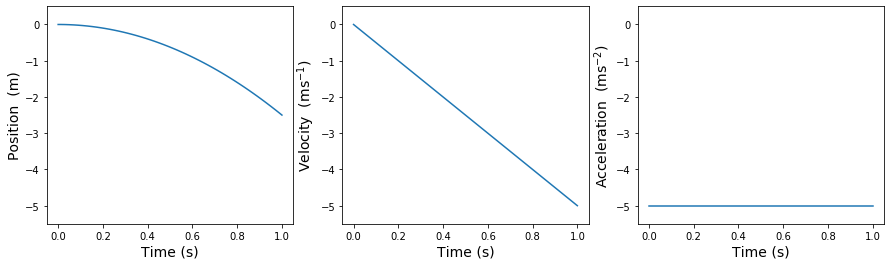

In [51]:
n      = 101                   
t      = np.linspace(0, 1, n)
a      = -5 * np.ones(n)        
v      = integral(t, a, 0)
x      = integral(t, v, 0)

plot_kinematics(t, x, v, a, ylim=(-5.5, 0.5))

<a name="sinusoidal"></a>
## <span style="color:#000000">Sinusoidal movement</span>
[Back to Table of Contents](#toc)
<br>
<br>

When one kinematic varies sinusoidally, the other kinematic quantities also vary sinusoidally.

This case is similar to rhythmic movements (e.g. walking, cycling)

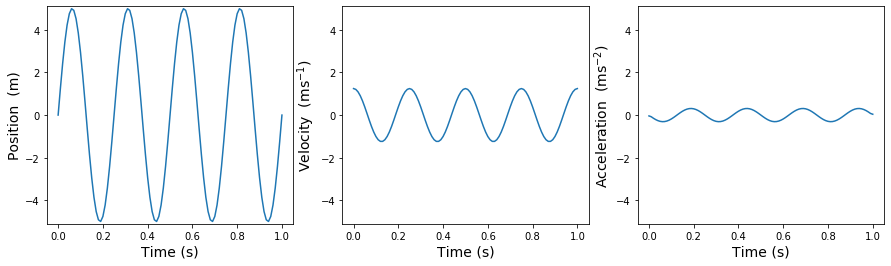

In [58]:
n      = 101                   
t      = np.linspace(0, 1, n)
x      = 5 * np.sin( 2*np.pi*(4*t) ) 
v      = gradient(t, x)
a      = gradient(t, v)



plot_kinematics(t, x, v, a, ylim=(-5.1, 5.1))

<a name="startstop"></a>
## <span style="color:#000000">Starting and stopping</span>
[Back to Table of Contents](#toc)
<br>
<br>

Suddenly starting or stopping movements are usually accompanied by very large accelerations.

This case is relevant to many sports movements.

This case is also very important for understanding injury (e.g., muscle & ligament tears, concussion, etc.)




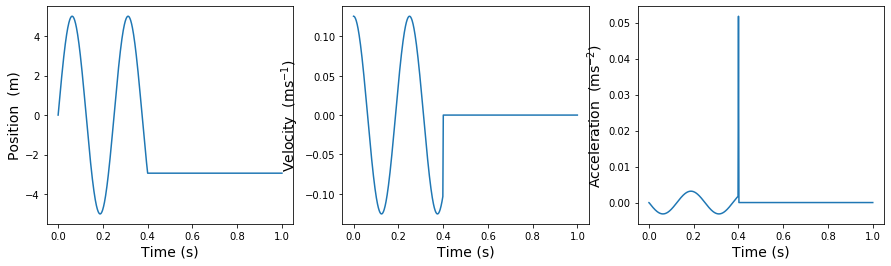

In [63]:
n      = 1001                   
t      = np.linspace(0, 1, n)
x      = 5 * np.sin( 2*np.pi*(4*t) ) 
x[400:] = x[400]
v      = gradient(t, x)
a      = gradient(t, v)



plot_kinematics(t, x, v, a, ylim=None)

<a name="deformation"></a>
## <span style="color:#000000">Deformation</span>
[Back to Table of Contents](#toc)
<br>
<br>

* Deformation occurs in all biological tissues (even bone).
* Deformation often occurs during movment transitions (e.g. stopping or reversing directions). 
* Greater deformation generally implies smaller accelerations.
* Smaller accelerations generally protect tissues.
* However, greater deformation can also damage tissues.
* Therefore, when considering the kinematics of soft tissues, it is important to carefully consider both deformation and acceleration;  deformation can be both good and bad!


<center>
    <img src="img/deformation.png" alt="image" width="500"/>
    <br>
    <em>Figure 1. &nbsp; A soft ball bouncing and undergoing deformation.</em>
</center>





____

<a name="projectile"></a>
# <span style="color:#000000">Projectile Motion</span>
[Back to Table of Contents](#toc)
<br>
<br>

* A projectile is a body that is subjected to a single, constant external force (usually gravity).
* Although kinematics does not consider forces, this single-force case is required to define a projectile;  we can study projectile kinematics without considering the nature of the external force.
* A projectile's kinematics are defined by (a) its initial velocity, and (b) the constant acceleration.

The motion of a projectile that is subject to only gravitational force (gravitational acceleration: $g$ = 9.812 ms$^{-2}$) is specified by the following equations:

\begin{align}
a(t) &= -g\\
v(t) &= -gt + v_0\\
x(t) &= -\frac{1}{2}gt^2 + v_0 t + x_0\\
\end{align}

where $v_0$ and $x_0$ are the initial velocity and initial position, respectively.

* The resulting motion is describable by the [constant acceleration](#constacc) case above.
* While 1D projectile motion seems simple, questions relevant to this type of motion can be quite complex. For example:
    * What is the maximum position of a projectile? <span style="color:red">(answer below)</span>
    * What initial velocity is required for the projectile to achieve a maximum position of $X$?
    * How much time is required for the projectile to travel between the positions $x$ = 10 m and $x$ = 0 m?

If we can't understand projectile motion, we will never be able to understand the motion of complex systems like human bodies!

<br>
<br>
<br>

<a name="maxposition"></a>
**Maximum position**
* A projectile reaches its maximum (or minimum) position when velocity is zero.
* We therefore set velocity to zero, then calculate the amount of time required for the projectile to reach its maximum position ($t_\max$).

\begin{align}
v(t=t_\max) = -gt_\max + v_0 &= 0\\
t_\max &= \frac{v_0}{g}
\end{align}

* The maximum position is thus the position at $t_\max$:

\begin{align}
x_\max &= -\frac{1}{2}g\left(\frac{v_0}{g}\right)^2 + v_0\left(\frac{v_0}{g}\right) + x_0\\
&= -\frac{v_0^2}{2g} + \frac{v_0^2}{g} + x_0\\
&= \frac{v_0^2}{2g} + x_0
\end{align}


<br>
<br>

[Back to Table of Contents](#toc)

____

<a name="summary"></a>
# Summary
[Back to Table of Contents](#toc)
<br>


* This chapter has provided an overview of Kinematics, and how it relates to the study of human motion
* The simplest type of kinematics to study is 1D linear motion
* However, even for 1D linear motion, many complex questions can be considered
    * If we can not understand simple 1D linear motion, we will never be able to understand real-world 3D kinematics!
* Projectile motion was considered, along with several special-case examples of 1D motion
    * Many of these special cases represent real human motion situations